In [12]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/chopp/Downloads/SalaryData_Train(1).csv")
test = pd.read_csv("C:/Users/chopp/Downloads/SalaryData_Test(1) (1).csv")

In [3]:

df1 = train.copy()
df2 = test.copy()

In [4]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
df2.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
tr1 = df1.iloc[:,0:13]
tr1 = pd.get_dummies(tr1)
tr1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
30157,40,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
30158,58,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
30159,22,9,0,0,20,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
tr1.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
age,1.000000,0.043525,0.080152,0.060278,0.101598,0.056623,0.068252,-0.210483,0.111037,0.150425,...,0.001061,0.007835,0.000024,0.001922,-0.007879,-0.004940,0.007867,0.016210,-0.017776,0.000657
educationno,0.043525,1.000000,0.124416,0.079691,0.152522,0.058244,0.097378,-0.165069,0.078843,0.010605,...,-0.043058,-0.042084,0.001815,0.017812,0.049129,0.008183,-0.017134,0.127224,-0.010953,-0.001661
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431,-0.006300,-0.009625,-0.048182,0.096481,0.033322,...,-0.003826,-0.006270,-0.002816,-0.002582,0.007639,-0.003502,-0.003603,0.012361,-0.002493,-0.002317
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454,0.010416,0.014781,-0.036497,0.031004,0.020282,...,-0.007341,-0.004551,-0.004174,0.005688,0.005688,-0.005189,0.008857,0.015688,0.000352,-0.005034
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000,0.005229,0.001611,-0.095532,0.126254,0.087835,...,0.003162,-0.012015,0.000689,0.014327,-0.000305,0.012846,-0.007566,0.010667,-0.010381,0.006983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_ Thailand,-0.004940,0.008183,-0.003502,-0.005189,0.012846,-0.004266,-0.006442,-0.008144,0.018051,0.008065,...,-0.000798,-0.001430,-0.000454,-0.001154,-0.000887,1.000000,-0.000580,-0.076406,-0.001095,-0.000547
native_ Trinadad&Tobago,0.007867,-0.017134,-0.003603,0.008857,-0.007566,-0.004390,-0.001255,0.002165,0.002630,-0.002420,...,-0.000821,-0.001472,-0.000467,-0.001187,-0.000913,-0.000580,1.000000,-0.078622,-0.001127,-0.000563
native_ United-States,0.016210,0.127224,0.012361,0.015688,0.010667,0.017525,0.032914,-0.049755,0.007331,0.014490,...,-0.108085,-0.193767,-0.061455,-0.156286,-0.120145,-0.076406,-0.078622,1.000000,-0.148365,-0.074123
native_ Vietnam,-0.017776,-0.010953,-0.002493,0.000352,-0.010381,-0.000004,-0.003953,0.009370,-0.004973,-0.003405,...,-0.001549,-0.002777,-0.000881,-0.002240,-0.001722,-0.001095,-0.001127,-0.148365,1.000000,-0.001062


(array([  0.5,   2.5,   4.5,   6.5,   8.5,  10.5,  12.5,  14.5,  16.5,
         18.5,  20.5,  22.5,  24.5,  26.5,  28.5,  30.5,  32.5,  34.5,
         36.5,  38.5,  40.5,  42.5,  44.5,  46.5,  48.5,  50.5,  52.5,
         54.5,  56.5,  58.5,  60.5,  62.5,  64.5,  66.5,  68.5,  70.5,
         72.5,  74.5,  76.5,  78.5,  80.5,  82.5,  84.5,  86.5,  88.5,
         90.5,  92.5,  94.5,  96.5,  98.5, 100.5]),
 [Text(0.5, 0, 'age'),
  Text(2.5, 0, 'capitalgain'),
  Text(4.5, 0, 'hoursperweek'),
  Text(6.5, 0, 'workclass_ Local-gov'),
  Text(8.5, 0, 'workclass_ Self-emp-inc'),
  Text(10.5, 0, 'workclass_ State-gov'),
  Text(12.5, 0, 'education_ 10th'),
  Text(14.5, 0, 'education_ 12th'),
  Text(16.5, 0, 'education_ 5th-6th'),
  Text(18.5, 0, 'education_ 9th'),
  Text(20.5, 0, 'education_ Assoc-voc'),
  Text(22.5, 0, 'education_ Doctorate'),
  Text(24.5, 0, 'education_ Masters'),
  Text(26.5, 0, 'education_ Prof-school'),
  Text(28.5, 0, 'maritalstatus_ Divorced'),
  Text(30.5, 0, 'maritalstatu

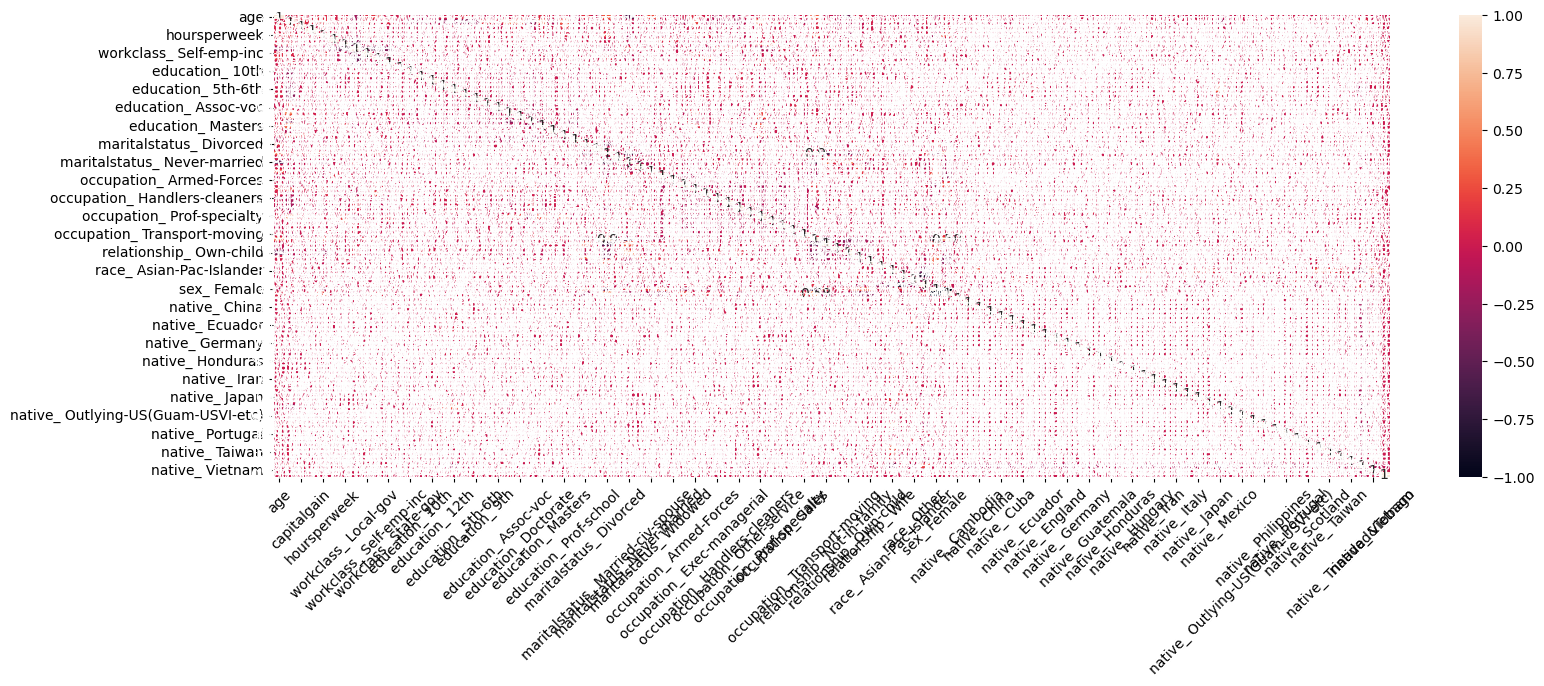

In [13]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(tr1.corr(), annot=True);
plt.xticks(rotation=45)

Skew: -0.305378355820322
Kurtosis: 0.643604835875955


C:\Users\chopp\AppData\Local\Temp\ipykernel_524\2577137992.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['educationno'],shade=True,color='g')


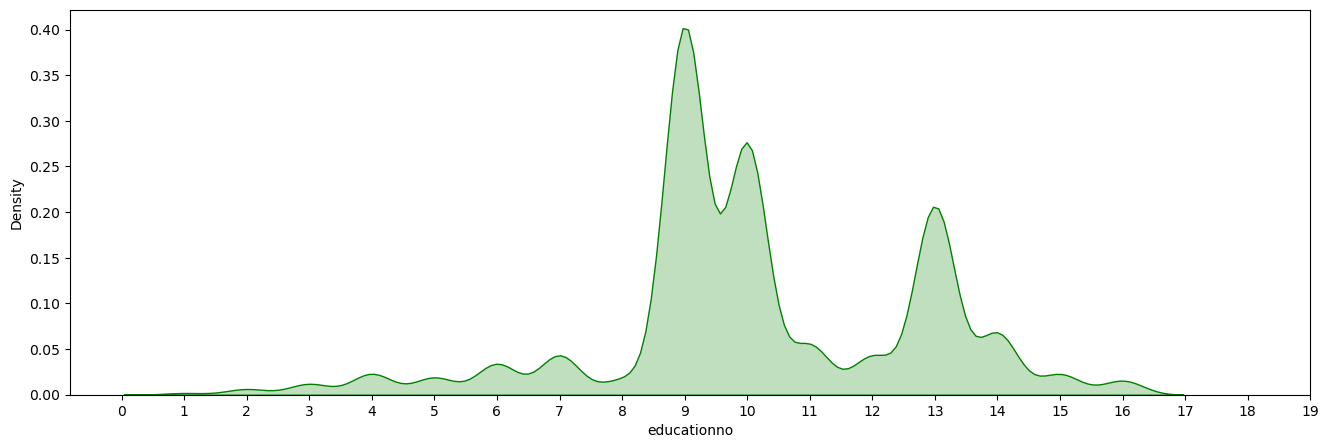

In [22]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(tr1['educationno'].skew()))
print("Kurtosis: {}".format(tr1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

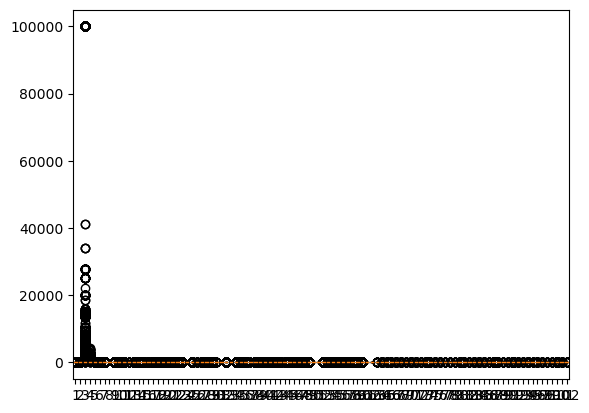

In [26]:
fig = plt.figure()
plt.boxplot(tr1)

plt.show()

In [9]:
te1 = test.iloc[:,0:13]
te1 = pd.get_dummies(te1)
te1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15056,39,13,0,0,36,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15057,38,13,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15058,44,13,5455,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [18]:
te1.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
age,1.000000,0.026123,0.078760,0.057745,0.102758,0.051324,0.054745,-0.208149,0.098253,0.167119,...,0.012382,-0.000955,0.030071,-0.003233,-0.006926,0.006293,-0.007570,0.003503,-0.005816,0.008892
educationno,0.026123,1.000000,0.131750,0.085817,0.133691,0.048378,0.094822,-0.164526,0.085737,0.010524,...,-0.054313,-0.046533,-0.000016,0.013164,0.039354,0.006113,0.004616,0.142546,-0.008877,-0.016602
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501,-0.000187,-0.016926,-0.047502,0.113224,0.018471,...,-0.005241,-0.006316,-0.003556,0.001489,0.000762,-0.001877,-0.002179,0.008096,-0.003286,0.003071
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712,0.006550,-0.001063,-0.026207,0.049314,0.006089,...,-0.009459,0.017583,-0.005359,-0.002875,-0.006442,0.002413,-0.005053,0.004940,-0.000519,-0.004726
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000,0.011716,-0.008102,-0.092627,0.118697,0.088353,...,0.006179,-0.008401,0.002576,0.017834,0.001617,0.006161,0.002959,0.009312,-0.002184,-0.019068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_ Thailand,0.006293,0.006113,-0.001877,0.002413,0.006161,-0.005029,0.001647,0.006472,0.006700,-0.008669,...,-0.001219,-0.001874,-0.000691,-0.001262,-0.000830,1.000000,-0.000651,-0.092973,-0.001004,-0.000609
native_ Trinadad&Tobago,-0.007570,0.004616,-0.002179,-0.005053,0.002959,0.012588,0.005145,-0.005558,0.010495,-0.007077,...,-0.000995,-0.001530,-0.000564,-0.001030,-0.000678,-0.000651,1.000000,-0.075902,-0.000819,-0.000497
native_ United-States,0.003503,0.142546,0.008096,0.004940,0.009312,0.013979,0.037079,-0.043196,0.001639,0.008126,...,-0.142095,-0.218434,-0.080509,-0.147092,-0.096773,-0.092973,-0.075902,1.000000,-0.117016,-0.070998
native_ Vietnam,-0.005816,-0.008877,-0.003286,-0.000519,-0.002184,-0.006330,-0.002244,0.004626,-0.007062,0.009093,...,-0.001534,-0.002358,-0.000869,-0.001588,-0.001045,-0.001004,-0.000819,-0.117016,1.000000,-0.000766


(array([  0.5,   2.5,   4.5,   6.5,   8.5,  10.5,  12.5,  14.5,  16.5,
         18.5,  20.5,  22.5,  24.5,  26.5,  28.5,  30.5,  32.5,  34.5,
         36.5,  38.5,  40.5,  42.5,  44.5,  46.5,  48.5,  50.5,  52.5,
         54.5,  56.5,  58.5,  60.5,  62.5,  64.5,  66.5,  68.5,  70.5,
         72.5,  74.5,  76.5,  78.5,  80.5,  82.5,  84.5,  86.5,  88.5,
         90.5,  92.5,  94.5,  96.5,  98.5, 100.5]),
 [Text(0.5, 0, 'age'),
  Text(2.5, 0, 'capitalgain'),
  Text(4.5, 0, 'hoursperweek'),
  Text(6.5, 0, 'workclass_ Local-gov'),
  Text(8.5, 0, 'workclass_ Self-emp-inc'),
  Text(10.5, 0, 'workclass_ State-gov'),
  Text(12.5, 0, 'education_ 10th'),
  Text(14.5, 0, 'education_ 12th'),
  Text(16.5, 0, 'education_ 5th-6th'),
  Text(18.5, 0, 'education_ 9th'),
  Text(20.5, 0, 'education_ Assoc-voc'),
  Text(22.5, 0, 'education_ Doctorate'),
  Text(24.5, 0, 'education_ Masters'),
  Text(26.5, 0, 'education_ Prof-school'),
  Text(28.5, 0, 'maritalstatus_ Divorced'),
  Text(30.5, 0, 'maritalstatu

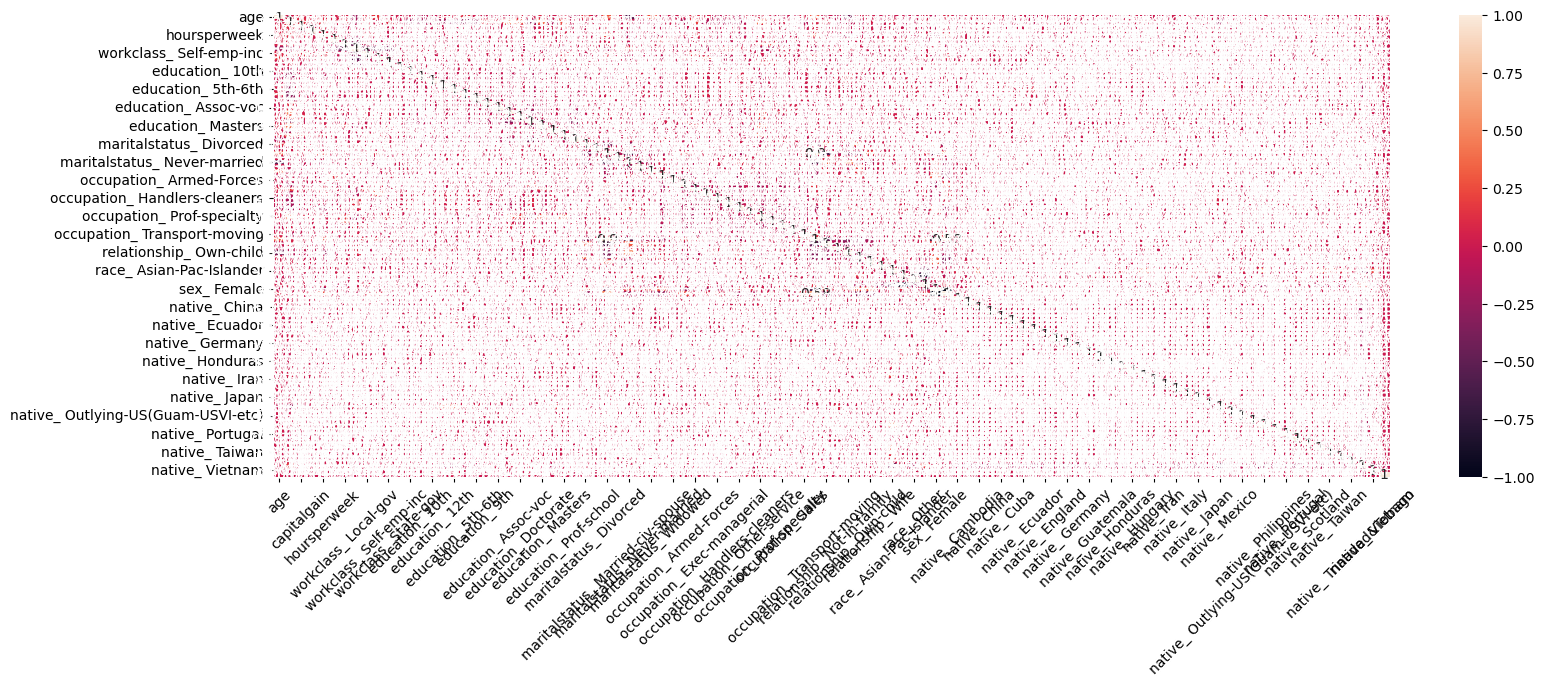

In [15]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(te1.corr(), annot=True);
plt.xticks(rotation=45)

Skew: -0.32099937243135945
Kurtosis: 0.6184678428156434


C:\Users\chopp\AppData\Local\Temp\ipykernel_524\3955389465.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df1['educationno'],shade=True,color='g')


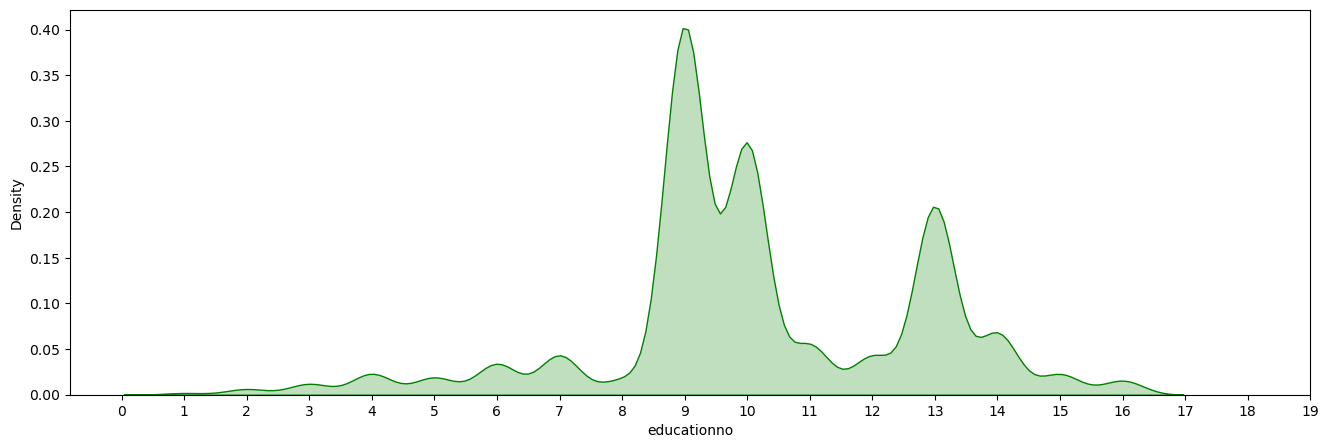

In [21]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(te1['educationno'].skew()))
print("Kurtosis: {}".format(te1['educationno'].kurtosis()))
ax = sns.kdeplot(df1['educationno'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

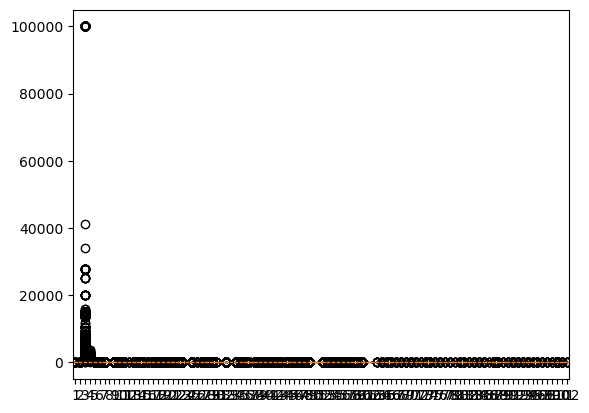

In [27]:
fig = plt.figure()
plt.boxplot(te1)

plt.show()

In [11]:
#train data concat
finaltrain = pd.concat([tr1, df1['Salary']],axis=1)
finaltrain

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,<=50K
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
30157,40,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,>50K
30158,58,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
30159,22,9,0,0,20,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K


In [12]:
#test data concat
finaltest = pd.concat([te1, df2['Salary']],axis=1)
finaltest

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,>50K
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,>50K
4,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
15056,39,13,0,0,36,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
15057,38,13,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K
15058,44,13,5455,0,40,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,<=50K


In [13]:
# Finaltrain data
X = finaltrain.values[:,0:102]
Y = finaltrain.values[:,102]

#Finaltest data
x = finaltest.values[:,0:102]
y = finaltest.values[:,102]

In [14]:
classifier_mb = MB()
classifier_mb.fit(X,Y)
train_pred_m = classifier_mb.predict(X)
accuracy_train_m = np.mean(train_pred_m==Y)

In [15]:
test_pred_m = classifier_mb.predict(x)
accuracy_test_m = np.mean(test_pred_m==y)

In [16]:
print("Training accuracy is:",accuracy_train_m,"\n","Testing accuracy is:",accuracy_test_m)

Training accuracy is: 0.7729186698053778 
 Testing accuracy is: 0.7749667994687915


In [18]:
test_pred_g = classifier_gb.predict(x)
accuracy_test_g = np.mean(test_pred_g==y)

In [19]:
accuracy_test_g

0.8029216467463479